In [3]:
# ===============================
# 기본 라이브러리
# ===============================
import pandas as pd
import numpy as np

# ===============================
# 시각화
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 머신러닝
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===============================
# 기타
# ===============================
from io import StringIO


In [4]:
data = StringIO("""
user_id,device,region,price,qty,stay_time,page_view,purchased
1,pc,Seoul,12000,1,300,5,1
2,mobile,Seoul,8000,1,120,3,0
3,pc,Busan,15000,2,420,7,1
4,mobile,Busan,7000,1,80,2,0
5,pc,Seoul,20000,1,500,9,1
6,mobile,Seoul,9000,1,150,4,0
7,pc,Incheon,13000,1,260,6,1
8,mobile,Incheon,6000,1,70,2,0
9,pc,Seoul,17000,2,480,8,1
10,mobile,Busan,7500,1,90,3,0
""")

df = pd.read_csv(data)


In [5]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased
0,1,pc,Seoul,12000,1,300,5,1
1,2,mobile,Seoul,8000,1,120,3,0
2,3,pc,Busan,15000,2,420,7,1
3,4,mobile,Busan,7000,1,80,2,0
4,5,pc,Seoul,20000,1,500,9,1
5,6,mobile,Seoul,9000,1,150,4,0
6,7,pc,Incheon,13000,1,260,6,1
7,8,mobile,Incheon,6000,1,70,2,0
8,9,pc,Seoul,17000,2,480,8,1
9,10,mobile,Busan,7500,1,90,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    10 non-null     int64 
 1   device     10 non-null     object
 2   region     10 non-null     object
 3   price      10 non-null     int64 
 4   qty        10 non-null     int64 
 5   stay_time  10 non-null     int64 
 6   page_view  10 non-null     int64 
 7   purchased  10 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 768.0+ bytes


In [7]:
df['sales']=df['price']*df['qty']

In [8]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales
0,1,pc,Seoul,12000,1,300,5,1,12000
1,2,mobile,Seoul,8000,1,120,3,0,8000
2,3,pc,Busan,15000,2,420,7,1,30000
3,4,mobile,Busan,7000,1,80,2,0,7000
4,5,pc,Seoul,20000,1,500,9,1,20000
5,6,mobile,Seoul,9000,1,150,4,0,9000
6,7,pc,Incheon,13000,1,260,6,1,13000
7,8,mobile,Incheon,6000,1,70,2,0,6000
8,9,pc,Seoul,17000,2,480,8,1,34000
9,10,mobile,Busan,7500,1,90,3,0,7500


In [9]:
df['고객유형']='단기체류'

In [10]:
df.loc[df['stay_time']>=300,'고객유형']='장기체류'

In [11]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류
5,6,mobile,Seoul,9000,1,150,4,0,9000,단기체류
6,7,pc,Incheon,13000,1,260,6,1,13000,단기체류
7,8,mobile,Incheon,6000,1,70,2,0,6000,단기체류
8,9,pc,Seoul,17000,2,480,8,1,34000,장기체류
9,10,mobile,Busan,7500,1,90,3,0,7500,단기체류


In [12]:
df.head(5)

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류


In [13]:
df2=df.groupby('device').agg(방문자수=('user_id','count'),
                        구매자수=('purchased','sum'),
                        구매전환율=('purchased','mean'),
                        평균주문금액=('sales','mean'))

In [14]:
df2=df2.reset_index()

In [15]:
df2

,device,방문자수,구매자수,구매전환율,평균주문금액
0,mobile,5,0,0.0,7500.0
1,pc,5,5,1.0,21800.0


In [16]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류
5,6,mobile,Seoul,9000,1,150,4,0,9000,단기체류
6,7,pc,Incheon,13000,1,260,6,1,13000,단기체류
7,8,mobile,Incheon,6000,1,70,2,0,6000,단기체류
8,9,pc,Seoul,17000,2,480,8,1,34000,장기체류
9,10,mobile,Busan,7500,1,90,3,0,7500,단기체류


In [19]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# MariaDB 권장
pymysql.install_as_MySQLdb()

USER = "root"
PASSWORD = "1234"
HOST = "localhost"
PORT = 3306
DB = "sin_ce2"   # 네 DB명

engine = create_engine(
    f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}?charset=utf8mb4",
    pool_pre_ping=True
)


In [20]:
df.to_sql(
    name="user_info2",
    con=engine,
    if_exists="replace",   # 연습: replace / 실무: append
    index=False
)

10

In [21]:
df_qu1='''SELECT u.region,u.device,AVG(u.purchased)AS 구매전환율,SUM(u.sales) 
FROM user_info2 u
GROUP BY u.region,u.device
ORDER BY AVG(u.purchased) DESC
LIMIT 3;'''

In [22]:
df3=pd.read_sql(df_qu1,engine)

In [23]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류
5,6,mobile,Seoul,9000,1,150,4,0,9000,단기체류
6,7,pc,Incheon,13000,1,260,6,1,13000,단기체류
7,8,mobile,Incheon,6000,1,70,2,0,6000,단기체류
8,9,pc,Seoul,17000,2,480,8,1,34000,장기체류
9,10,mobile,Busan,7500,1,90,3,0,7500,단기체류


In [24]:
df2

,device,방문자수,구매자수,구매전환율,평균주문금액
0,mobile,5,0,0.0,7500.0
1,pc,5,5,1.0,21800.0


In [25]:
df3

,region,device,구매전환율,SUM(u.sales)
0,Seoul,pc,1.0,66000.0
1,Busan,pc,1.0,30000.0
2,Incheon,pc,1.0,13000.0


C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  plt.tight_layout()
C:\Users\SHIN\AppData\Local\Temp\ipykernel_13240\1115759097.py:10: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\U

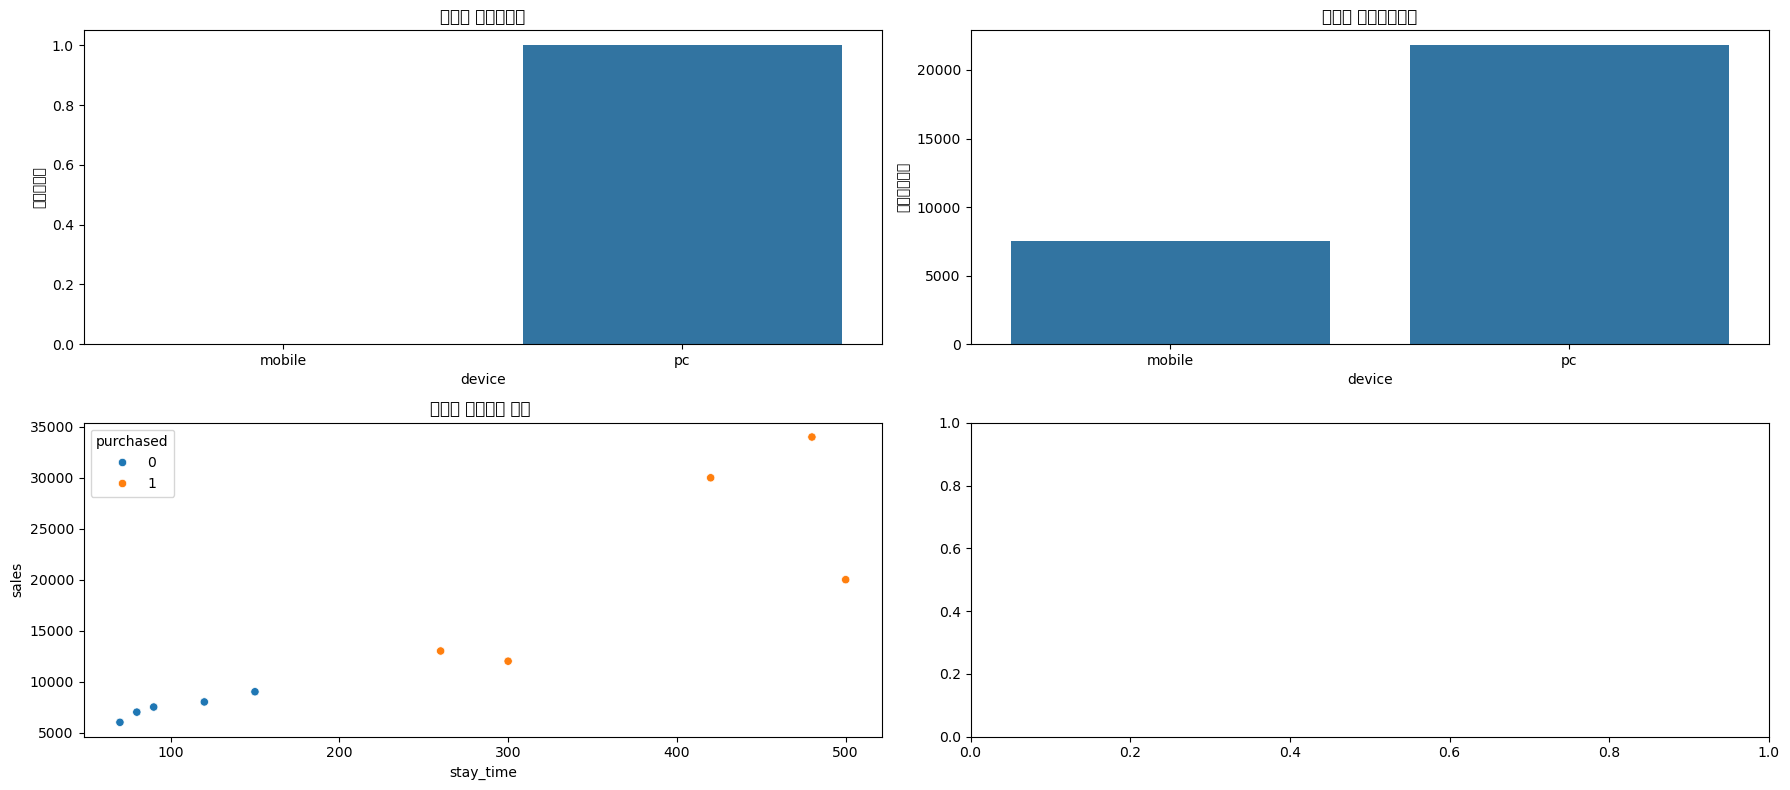

In [26]:

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(18,8))

sns.barplot(data=df2,x='device',y='구매전환율',ax=axes[0,0])
axes[0,0].set_title('기기별 구매전환율')
sns.barplot(data=df2,x='device',y='평균주문금액',ax=axes[0,1])
axes[0,1].set_title('기기별 평균주문금액')
sns.scatterplot(data=df,x='stay_time',y='sales',hue='purchased',ax=axes[1,0])
axes[1,0].set_title('기기별 체류시간 금액 ')

plt.tight_layout()
plt.show()

In [27]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류
5,6,mobile,Seoul,9000,1,150,4,0,9000,단기체류
6,7,pc,Incheon,13000,1,260,6,1,13000,단기체류
7,8,mobile,Incheon,6000,1,70,2,0,6000,단기체류
8,9,pc,Seoul,17000,2,480,8,1,34000,장기체류
9,10,mobile,Busan,7500,1,90,3,0,7500,단기체류


In [28]:
df.columns

Index(['user_id', 'device', 'region', 'price', 'qty', 'stay_time', 'page_view',
       'purchased', 'sales', '고객유형'],
      dtype='object')

In [29]:
df_cor=df[['price', 'qty', 'stay_time', 'page_view',
       'purchased', 'sales',]].corr()

<Axes: >

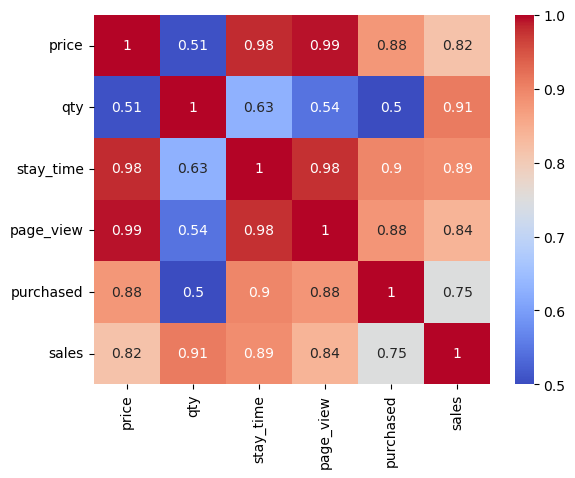

In [30]:
sns.heatmap(data=df_cor,annot=True,cmap='coolwarm')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [66]:
X=pd.concat([df,df5],axis=1)

In [67]:
X.columns

Index(['user_id', 'device', 'region', 'price', 'qty', 'stay_time', 'page_view',
       'purchased', 'sales', '고객유형', 'mobile', 'pc'],
      dtype='object')

In [70]:
df5=pd.get_dummies(df['device'])

In [85]:
df=pd.concat([df,df5],axis=1)

In [86]:
df

,user_id,device,region,price,qty,stay_time,page_view,purchased,sales,고객유형,mobile,pc
0,1,pc,Seoul,12000,1,300,5,1,12000,장기체류,False,True
1,2,mobile,Seoul,8000,1,120,3,0,8000,단기체류,True,False
2,3,pc,Busan,15000,2,420,7,1,30000,장기체류,False,True
3,4,mobile,Busan,7000,1,80,2,0,7000,단기체류,True,False
4,5,pc,Seoul,20000,1,500,9,1,20000,장기체류,False,True
5,6,mobile,Seoul,9000,1,150,4,0,9000,단기체류,True,False
6,7,pc,Incheon,13000,1,260,6,1,13000,단기체류,False,True
7,8,mobile,Incheon,6000,1,70,2,0,6000,단기체류,True,False
8,9,pc,Seoul,17000,2,480,8,1,34000,장기체류,False,True
9,10,mobile,Busan,7500,1,90,3,0,7500,단기체류,True,False


In [87]:
X=df[['mobile','pc','page_view','price']]

In [88]:
y=df['purchased']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [93]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix
 [[2 0]
 [0 1]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0